# Exercise 4: Data exploration and visualization

We will work with the "IT Salary Survey EU 2020" dataset <br> See: https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data_df = pd.read_csv("IT Salary Survey EU  2020.csv")
data_df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [5]:
# List all columns
data_df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

## Explore programming languages

In [6]:
# Lets make a copy for us to work on
df = data_df.copy()
len(df)

1253

In [12]:
column_name = 'Your main technology / programming language'

In [9]:
# Check if values are missing (NaN)
df[df[column_name]].isnull

NameError: name 'column_name' is not defined

In [ ]:
# Show rows with missing values


In [ ]:
df[column_name].value_counts()

In [ ]:
# Remove missing values
df = df[-df[column_name].isnull()]
len(df)

**$\rightarrow$ categorical/ nominal variable**

In [ ]:
# List all (unique) programming languages


In [ ]:
plt.figure()
plt.plot.bar(df[column_name])

In [ ]:
# Convert to lowercase
df[column_name] = df[column_name].str.lower()

In [ ]:
# Find top 10 languages
top10 = df[column_name].value_counts()[:10]
top10

In [ ]:
languages = "|".join(l for l in top10.index)
languages

In [10]:
# extract strings using regular expressions
pattern = r"(javascript|java|python|php|c\+\+|c#|swift|scala|go|kotlin)"

df["Your main technology / programming language"] = df["Your main technology / programming language"].str.extract(pattern)

In [13]:
# Check top 10 again
top10 = df[column_name].value_counts()[:10]
top10

Your main technology / programming language
python        28
java          10
php            9
javascript     8
go             5
c++            5
kotlin         2
c#             1
swift          1
scala          1
Name: count, dtype: int64

In [14]:
counts = top10.sort_values()
categories = counts.index
count = counts.values

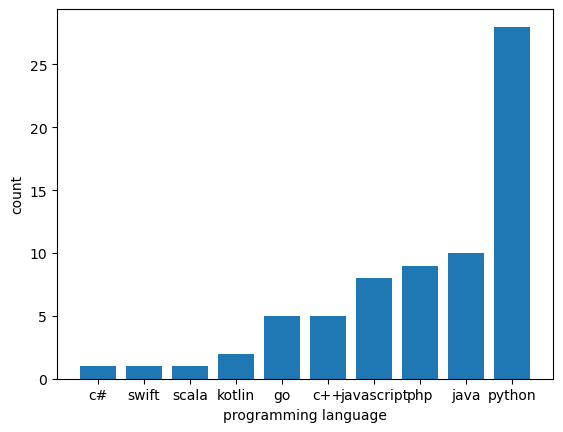

In [15]:
# use plt.bar()
plt.bar(categories, count)
plt.xlabel("programming language")
plt.ylabel("count")
plt.show()

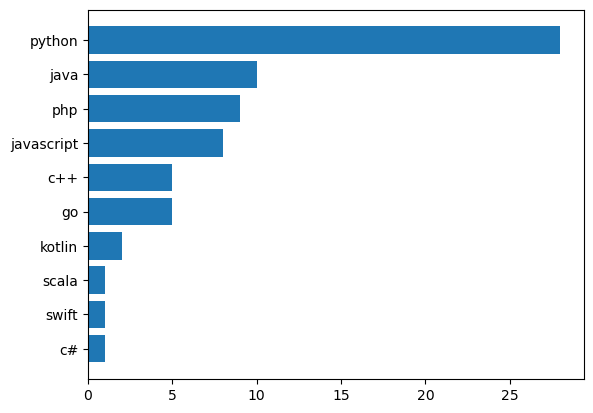

In [16]:
# horizonal barplot
plt.barh(categories, count)
plt.show()

### Preparing a plot for a (scientific) figure
**Size and font size**
* Page width: about 7 inches (= 180mm, typical DinA4 page with borders)
* We want to fit two plots next to each other $\rightarrow$ about 3 inches each
* We set the font size to 8
* The font should be editable in Inkscape!

**Improving visuals**
* Declutter = Remove unnecessary elements such as plot borders, grid lines etc.
* Draw attention to the important elements
* Avoid 3D effects
* Use color sparingly, avoid rainbow colormaps etc.

In [17]:
# Set font size
plt.rcParams['font.size'] = 12 # for now: 12, later: 8

# Make the text editable (in the SVG file)
plt.rcParams['svg.fonttype'] = 'none'

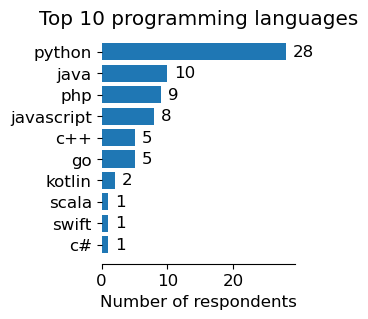

In [26]:
plt.figure(figsize=(2.5, 3))  # 2.5 to 3 inches width
plt.title("Top 10 programming languages")
plt.xlabel('Number of respondents')

# Horizontal barplot
bars = plt.barh(categories, count)

# Add count next to each bar
plt.bar_label(bars, padding = 5)

# Remove chart border & y-axis (declutter!)
sns.despine(left=True)
plt.tick_params(left=True)
# Save as PNG and SVG
plt.savefig("barplot_languages.png", bbox_inches="tight")
plt.savefig("barplot_languages.svg", bbox_inches="tight")

plt.show()

## Let's visualize the column "Age"

In [27]:
# Lets make a copy
df = data_df.copy()
len(df)

1253

In [29]:
#df["Age"].value_counts()
df["Age"].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

**$\rightarrow$ discrete variable**

In [30]:
# Remove missing values
df = df[~df["Age"].isnull()]
len(df)

1226

In [31]:
bins = np.arange(20, 69, 2)
bins

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52,
       54, 56, 58, 60, 62, 64, 66, 68])

In [ ]:
# Histogram using plt.hist()
plt.hist..
plt.show()

In [ ]:
bins = np.arrange(df["Age"])

In [ ]:

ret

In [ ]:
# Seaborn: Easy to use for pandas DataFrames!
sns.histplot(data=df, x = "Age", bins)
plt.show()

In [ ]:
sns.set_style("ticks")  # styles: {darkgrid, whitegrid, dark, white, ticks}

In [32]:
mean_age = df["Age"].mean()
mean_age

32.50978792822186

In [ ]:
sns.histplot(df, x='Age', bins=bins)

# Compute average age

print(mean_age)
plt.axvline(mean_age, label=f'mean age of: (mean_age: .0f)', color="red")
# Highlight average age by plotting a vertical line

plt.legend()
plt.show()

In [ ]:
# Width: 3 inches
plt.figure(figsize=(3, 2))
plt.title("Age distribution")

# Histogram
sns.histplot(df, x='Age', bins=bins)

# Highlight average age by plotting a vertical line


# Declutter: Remove the upper and right border


# Save as SVG
plt.savefig("plots/age.svg", bbox_inches="tight")
plt.show()

## Exploring age and total years of experience

In [33]:
# Let's make a copy
df = data_df.copy()
len(df)

1253

In [34]:
# remove NaN's from "Total years of experience"
df = df[~df["Total years of experience"].isnull()]
len(df)

1237

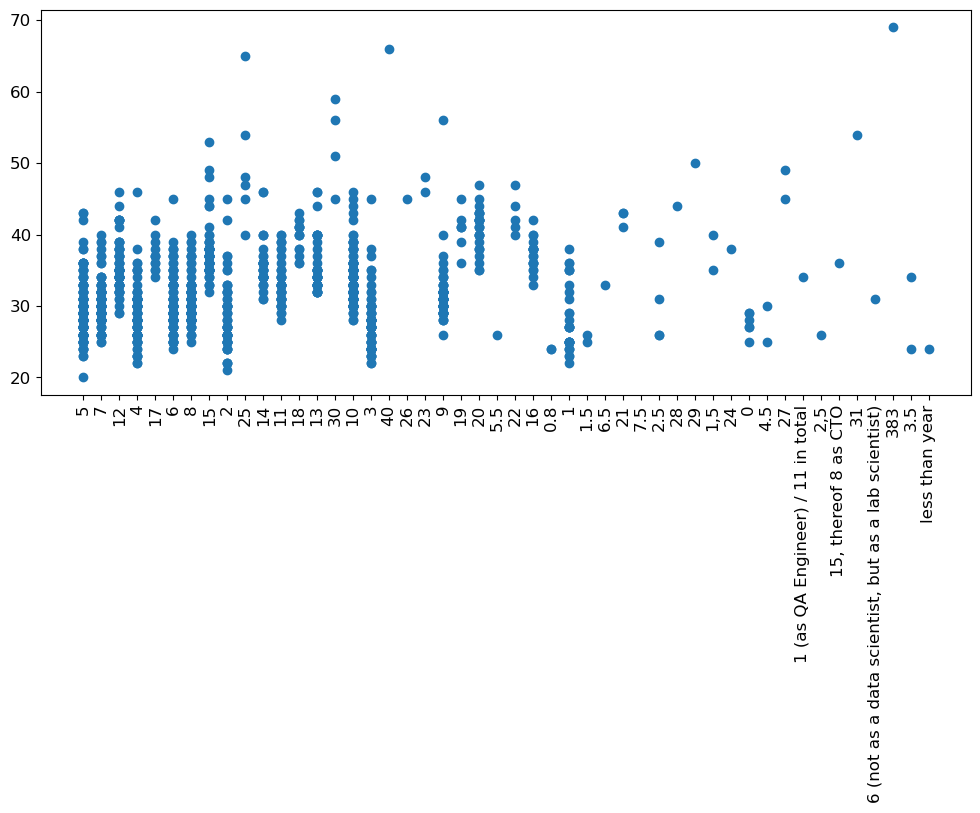

In [36]:
# Scatter plot: Years of experience vs. age
plt.figure(figsize=(12, 5))
plt.scatter(df["Total years of experience"], df["Age"])
_ = plt.xticks(rotation=90)

In [37]:
# Check datatype of the column
df["Total years of experience"].dtype

dtype('O')

Pandas datatype **object (O)**: String or mixed numeric and non-numeric values

In [38]:
# replace non-numeric values in column "Total years of experience" with NaN
df["Total years of experience"] = df["Total years of experience"].apply(pd.to_numeric, errors="coerce")

# remove NaN's from "Total years of experience" again
df = df[~df["Total years of experience"].isnull()]
len(df)

1230

In [39]:
# Check datatype of the column
df["Total years of experience"].dtype

dtype('float64')

Text(0.5, 0, 'Total years of experience')

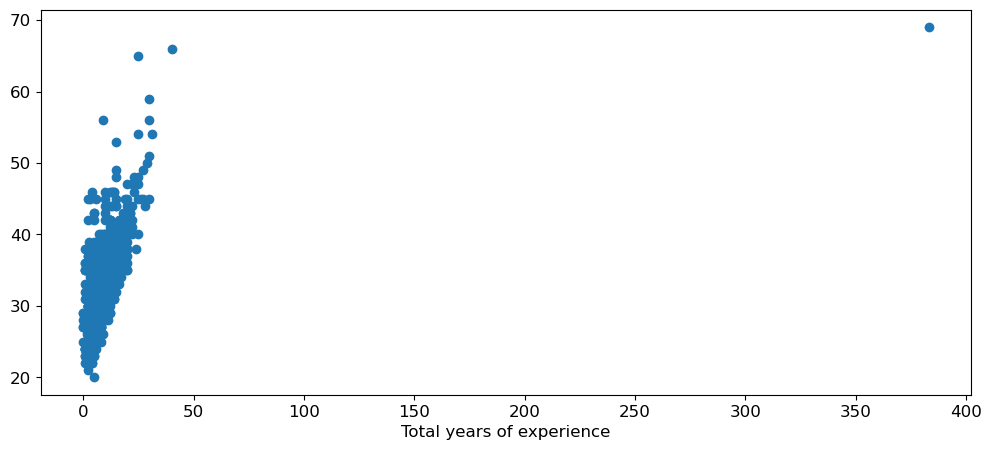

In [40]:
# plot it again
plt.figure(figsize=(12, 5))
plt.scatter(df["Total years of experience"], df["Age"])
plt.xlabel("Total years of experience")

**Remove outliers**

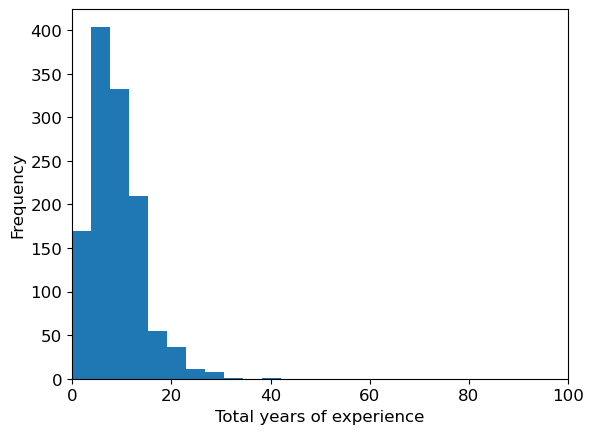

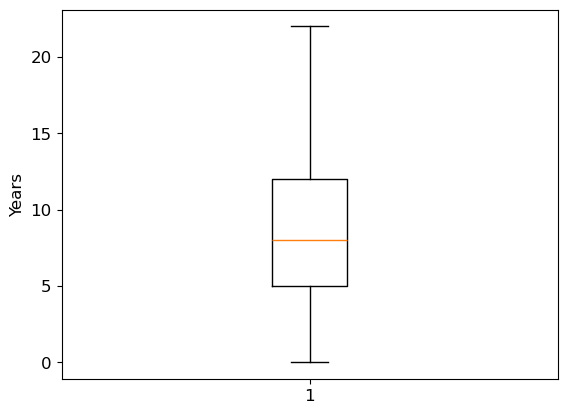

In [43]:
df["Total years of experience"].plot.hist(bins=100)
plt.xlabel("Total years of experience")
plt.xlim(0,100)
plt.show()
# --> positively skewed distribution

boxplot = plt.boxplot(df["Total years of experience"], showfliers=False)
plt.ylabel("Years")
plt.show()

In [44]:
[item.get_ydata() for item in boxplot['whiskers']]

[array([5., 0.]), array([12., 22.])]

In [45]:
df['Total years of experience'].describe()

count    1230.000000
mean        9.078130
std        11.901317
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: Total years of experience, dtype: float64

In [46]:
Q1 = df['Total years of experience'].describe()["25%"]
Q3 = df['Total years of experience'].describe()["75%"]

In [48]:
#Q3 + whis*(Q3-Q1)
upper_limit = Q3 + 1.5*(Q3-Q1)
upper_limit

22.5

In [49]:
# Q1 - whis*(Q3-Q1)
lower_limit = Q1 - 1.5*(Q3-Q1)
lower_limit

-5.5

In [ ]:
# Apply the limits to our DataFrame
df = df['Total years of experience'] > lower_limit) & (df['Total years of experience']

In [ ]:
# plot it again without outliers
plt.figure(figsize=(10, 5))
plt.scatter(df["Total years of experience"], df["Age"])
plt.xlabel("")
plt.show()

In [ ]:
plt.figure(figsize=(3, 2))
plt.title("Age vs. years of experience")
plt.xlabel("Years of experience")
plt.ylabel("Age in years")

# Scatter plot
plt.scatter(df["Total years of experience"], df["Age"], s=10)

# Declutter
sns.despine()

# Save as SVG
plt.savefig("plots/age_experience.svg", bbox_inches="tight")
plt.show()

## Analyzing salary & seniority level
Now, let's explore the yearly brutto salary and how it differs for seniority levels. <br>
We will look at different plot types for visualizing distributions and for comparing distributions among groups.

In [50]:
# Let's make a copy
df = data_df.copy()

In [ ]:
df = df.rename(columns={"Yearly brutto salary (without bonus and stocks) in EUR": "Yearly brutto salary in EUR"})

<Axes: ylabel='Yearly brutto salary in EUR'>

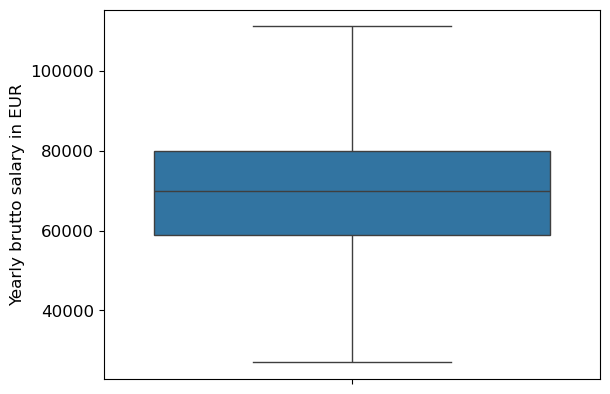

In [53]:
# Boxplot of salary distribution (here: using seaborn)
sns.boxplot(data=df, y="Yearly brutto salary in EUR", showfliers = False)

Outlier removal, as shown before:

In [54]:
df['Yearly brutto salary in EUR'].describe()

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Yearly brutto salary in EUR, dtype: float64

In [55]:
# Q3 + whis*(Q3 - Q1)
upper_limit = 80000 + 1.5*(80000 - 58800)

# Q1 - whis*(Q3 - Q1)
lower_limit = 58800 - 1.5*(80000 - 58800)

# Apply limits to DataFrame
df = df[(df["Yearly brutto salary in EUR"] <= upper_limit) &
        (df["Yearly brutto salary in EUR"] >= lower_limit)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

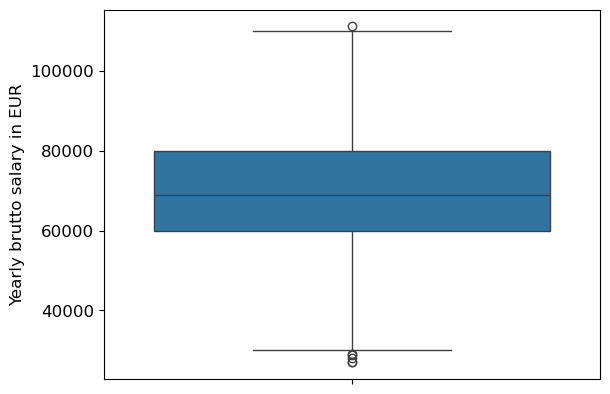

In [58]:
# Boxplot
sns.boxplot(data=df, y="Yearly brutto salary in EUR")

# Highlight median
plt.axhline(df["Yearly brutto salary in EUR"], color="red")

plt.show()

In [ ]:
# Barplot with errorbar (standard deviation)


# Highlight mean


plt.show()

In [ ]:
# Remove NaN's from column "Seniority level"
df = df[~df['Seniority level'].isnull()]

In [ ]:
sns.boxplot(data=df, y="Yearly brutto salary in EUR", x="Seniority level")
plt.show()

In [ ]:
# Find top 5 seniority levels

top5

In [ ]:
# Remove rows, only keep top 5 seniority levels


In [ ]:
# Boxplot

plt.show()

In [ ]:
# Violinplot

plt.show()

In [ ]:
# Barplot with errorbar

plt.show()

In [ ]:
# Only errorbar

plt.show()

In [ ]:
# Show raw values -> stripplot

plt.show()

In [ ]:
# Show raw values -> swarmplot

plt.show()

In [ ]:
# Order seniority levels by their median salary

order

In [ ]:
plt.figure(figsize=(3.5, 2))
plt.title("Salary by seniority level")

# Boxplot

# Stripplot


# Declutter
sns.despine()

# Save as SVG
plt.savefig("plots/salary_seniority.svg", bbox_inches="tight")
plt.show()

## Bonus: Colormaps

### Qualitative colormaps
E.g. for showing different categories

In [ ]:
sns.color_palette("tab10")

In [ ]:
sns.color_palette("pastel")

In [ ]:
sns.color_palette("Set1")

### Sequential colormaps


In [ ]:
sns.color_palette("Blues", as_cmap=True)

### Perceptually uniform sequential colormaps
= equal steps in values are perceived as equal steps in the color space <br>
Great for displaying heatmaps for example

In [ ]:
sns.color_palette("viridis", as_cmap=True)

In [ ]:
sns.color_palette("plasma", as_cmap=True)

In [ ]:
# Example: "Flights" dataset
flights = sns.load_dataset("flights")
sns.heatmap(flights.pivot(index="month", columns="year", values="passengers"), cmap="plasma")
plt.show()

### Diverging colormaps
Use these if there is a meaningful middle point. <br>
Example: Spearman correlation (-1: negative correlation, 0: no correlation, 1: positive correlation)

In [ ]:
sns.color_palette("RdBu", as_cmap=True)

In [ ]:
sns.color_palette("coolwarm", as_cmap=True)

**matplotlib colormaps** and when to use which: https://matplotlib.org/stable/users/explain/colors/colormaps.html